#  *Estudo* em data Science Jonas Felipe Barros Silva
# Feito no Jupyter no VScode

1.	Contextualização, motivação, importância
O estudo desse projeto visa encontrar a demanda de produtos ,a fim de conseguir estabelecer quais os mais vendidos, e no fim estimar quais serão os proximos produtos a serem vendidos 

2. Base de dados 
A base de dados agora é um arquivo CSV 'BD.csv'  de 9800 linhas com vendas de uma loja de artigos nos EUA de 2015 ate 2018. Esse arquivo será modificadon e tratado na analise exploratoria.
Vou usar a lib panda para importar os dados, como vemos no exemplo abaixo.


# **Análise Exploratória**

#https://drive.google.com/file/d/1dxvMs9imkXDZVA7G8T27uLQXct3jfp-p/view?usp=sharing
Passar para pasta do Colab 



In [11]:
import pandas as pd
import numpy as np
import matplotlib as mpl
BD = pd.read_csv('BD.csv')
print (BD)


      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
1          2  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
2          3  CA-2017-138688  12/06/2017  16/06/2017    Second Class   
3          4  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
4          5  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
...      ...             ...         ...         ...             ...   
9795    9796  CA-2017-125920  21/05/2017  28/05/2017  Standard Class   
9796    9797  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9797    9798  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9798    9799  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9799    9800  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United 

3.	Indicar o seu objetivo (qual a contribuição pretendida)? 
Analise de vendas e conseguir prever os proximos produtos a serem vendidos, tambem conseguir criar uma proporçao de saida de vendas.

 Análise Exploratória:

1.	Existem valores faltantes? Como foram tratados? Todas as informaçoes são relevantes ? 

Como são dados de coleçao de vendas, todo e qualquer dado, faltante iremos excluir a linha, vide que vamos analisar todas as linhas que estão faltando dados e ver as coorelaçes entre elas e verificar se essas linhas já não estavam completas na base de dados ultilizaremos a panda

In [12]:

BD2 = BD.dropna()
print(BD2)

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
1          2  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
2          3  CA-2017-138688  12/06/2017  16/06/2017    Second Class   
3          4  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
4          5  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
...      ...             ...         ...         ...             ...   
9795    9796  CA-2017-125920  21/05/2017  28/05/2017  Standard Class   
9796    9797  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9797    9798  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9798    9799  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9799    9800  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United 

com isso nosso banco de dados reduziu para 7343 linhas.
Como vou relevar alguns dados para a analise , vou remover primeiramente dados irrelevantes para nossa analise e depois vou tratar os dados novamente, e verificar se não perdi muitas amostras ja mostrando que a simples falta de dados podem fazer com o nosso objetivo final , 
Vamos remover Order ID , Order Date ,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region

In [13]:

BD3 = BD.drop(columns=["Order ID", "Order Date", "Ship Mode", "Customer ID", "Customer Name", "Segment", "Country", "City", "State", "Postal Code", "Region"])


Apos vou refazer o processo de pagar dados invalidos

In [14]:
BD3=BD3.dropna()
print(BD3)


      Row ID   Ship Date       Product ID         Category Sub-Category  \
0          1  11/11/2017  FUR-BO-10001798        Furniture    Bookcases   
1          2  11/11/2017  FUR-CH-10000454        Furniture       Chairs   
2          3  16/06/2017  OFF-LA-10000240  Office Supplies       Labels   
3          4  18/10/2016  FUR-TA-10000577        Furniture       Tables   
4          5  18/10/2016  OFF-ST-10000760  Office Supplies      Storage   
...      ...         ...              ...              ...          ...   
9795    9796  28/05/2017  OFF-BI-10003429  Office Supplies      Binders   
9796    9797  17/01/2016  OFF-AR-10001374  Office Supplies          Art   
9797    9798  17/01/2016  TEC-PH-10004977       Technology       Phones   
9798    9799  17/01/2016  TEC-PH-10000912       Technology       Phones   
9799    9800  17/01/2016  TEC-AC-10000487       Technology  Accessories   

                                           Product Name     Sales  
0                     Bush Some

Salvando CSV novo

In [15]:
BD3.to_csv(r'./BD3.csv', encoding='utf-8', header='true')

Possuimos 7353 linhas, 10 linhas a mais se excluissimos todas as linhas com dados faltantes , mas possuimos 2.447 menos que a original , então vamosexcluir somentes dados pertinentes ou seja as que não possuem o valor , a data de entrega sera extimada nesse ponto vou traduzir o banco da dados tbm mas o valor contunuara em doolar, prmieiro vou descobrir quais valores faltam e se tem como preencher nossa base de dados



In [16]:
BD.isnull().sum()


Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [17]:
BD.isnull().sum()
BD4 = BD.drop(columns=["Row ID","Order ID", "Customer ID", "Segment", "Country", "State", "Postal Code", "Region"])
BD.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

Vou Traduzir o nome das col unas e separar o mes e os anos da data de pedido

In [18]:

BD4.columns= ['Data_ped', 'Data_env', 'Modo de envio', 'Nome do cliente',
        'Cidade', 'ID do produto', 'Categoria', 'Subcategoria', 'Nome do produto',
        'Vendas']
BD4.info()
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
BD4['Data_ped'] = pd.to_datetime(BD4['Data_ped'], dayfirst = True)
BD4['Data_env'] = pd.to_datetime(BD4['Data_env'], dayfirst = True)
BD4.info()
BD4['ano'] = BD4['Data_ped'].dt.year
BD4['mes'] = BD4['Data_ped'].dt.month_name()
BD4['dia'] = BD4['Data_ped'].dt.day
BD4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Data_ped         9800 non-null   object 
 1   Data_env         9800 non-null   object 
 2   Modo de envio    9800 non-null   object 
 3   Nome do cliente  9800 non-null   object 
 4   Cidade           9800 non-null   object 
 5   ID do produto    9800 non-null   object 
 6   Categoria        9800 non-null   object 
 7   Subcategoria     9800 non-null   object 
 8   Nome do produto  9800 non-null   object 
 9   Vendas           9800 non-null   float64
dtypes: float64(1), object(9)
memory usage: 765.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Data_ped         9800 non-null   datetime64[ns]
 1   Data_env        

In [19]:
BD4['dia'] = BD4['Data_ped'].dt.day

In [20]:
BD4.head()

,Data_ped,Data_env,Modo de envio,Nome do cliente,Cidade,ID do produto,Categoria,Subcategoria,Nome do produto,Vendas,ano,mes,dia
0,2017-11-08,2017-11-11,Second Class,Claire Gute,Henderson,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,November,8
1,2017-11-08,2017-11-11,Second Class,Claire Gute,Henderson,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,November,8
2,2017-06-12,2017-06-16,Second Class,Darrin Van Huff,Los Angeles,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,June,12
3,2016-10-11,2016-10-18,Standard Class,Sean O'Donnell,Fort Lauderdale,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,October,11
4,2016-10-11,2016-10-18,Standard Class,Sean O'Donnell,Fort Lauderdale,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,October,11


Salvando o novo arquivo

In [21]:
BD4.to_csv(r'./BD4.csv', encoding='utf-8', header='true')

2.	Identificação de Outliers

array([[<AxesSubplot:title={'center':'Vendas'}>,
        <AxesSubplot:title={'center':'ano'}>],
       [<AxesSubplot:title={'center':'dia'}>, <AxesSubplot:>]],
      dtype=object)

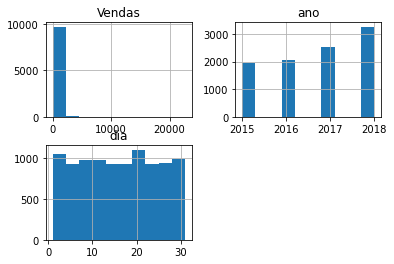

In [22]:
BD4.hist()

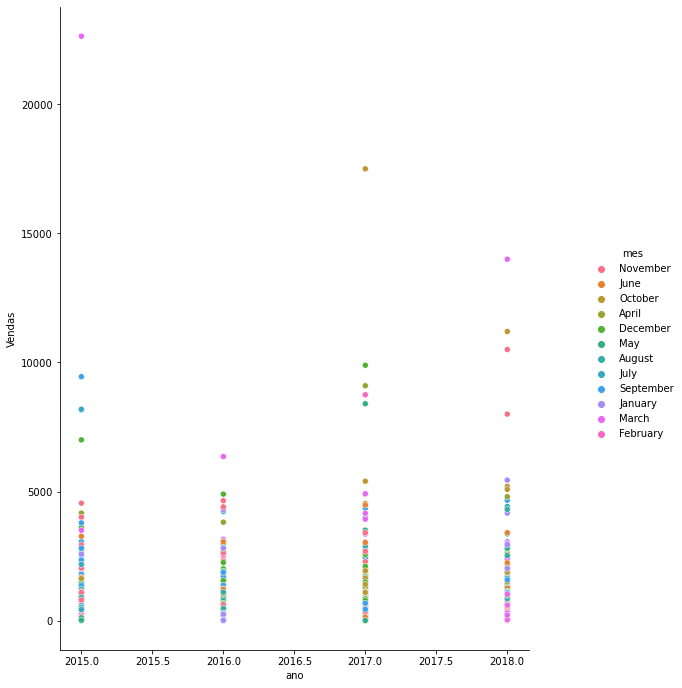

In [23]:
import seaborn as sns
fig=sns.relplot(x="ano", y="Vendas",hue="mes", data=BD4)
fig.fig.set_size_inches(10,10)

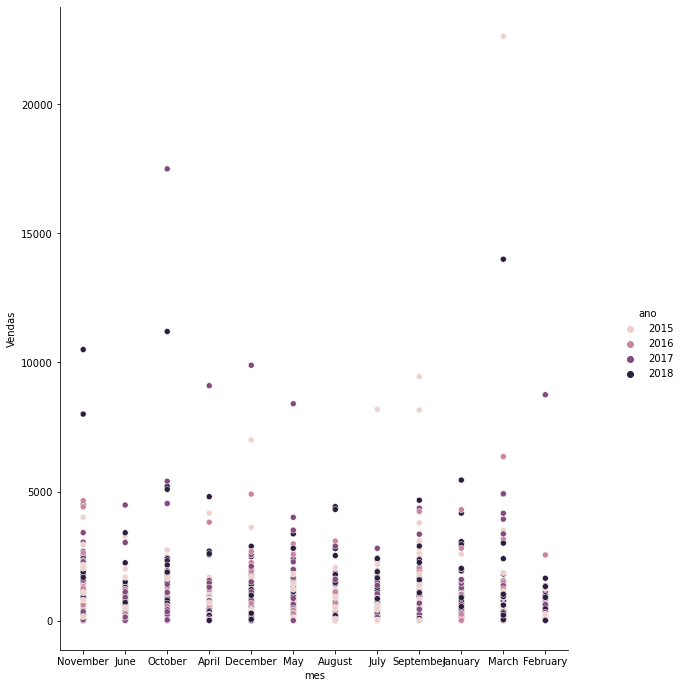

In [24]:
fig=sns.relplot(x="mes", y="Vendas",hue="ano", data=BD4)
fig.fig.set_size_inches(10,10)

Box plot antes de remover o outliers extremos

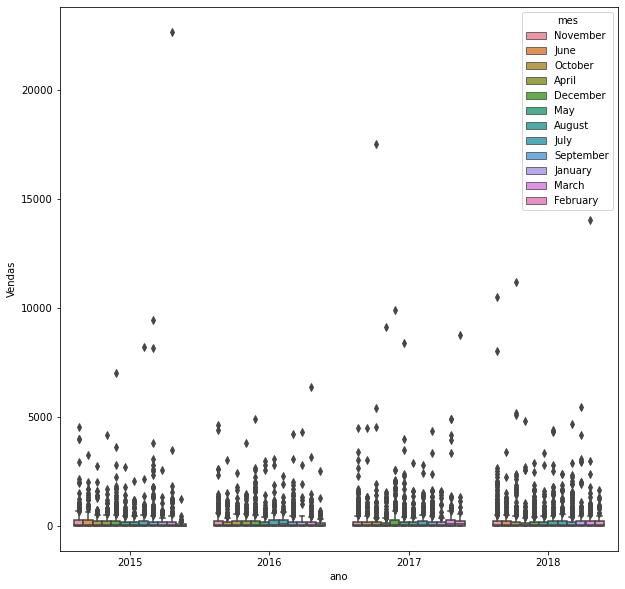

In [25]:
plt.figure(figsize=(10, 10))
fig=sns.boxplot(x="ano", y="Vendas" ,hue='mes',data=BD4,whis=1.5)

3.	Estatística Descritiva dos Dados;

4.	Técnicas de Feature Engineering utilizadas (conforme slide 08 da Aula 05);
Tratados dados faltantes detectados outliers devo remove-los? 
Pegar esses pontos com linha de codigo 

In [26]:
#Codigo https://estatsite.com.br/2020/03/23/detectando-outliers-pelo-desvio-padrao-no-python/ Yukio Editado por mim 
import matplotlib.pyplot as plt
import statistics

# inicia uma lista vazia onde colocaremos os outliers
outliers = []
outlier_idx =[]
BD4.reset_index(drop=True, inplace=True)
# desvio padrão 
desv_pad = statistics.stdev(BD4['Vendas'])

# média dos seus dados
media = statistics.mean(BD4['Vendas'])

# coloca o limite que determina se é outlier
limite = desv_pad * 3

limite_inferior = media - limite
limite_superior = media + limite

# Localiza outliers e anexa à nossa lista que iniciamos sem nada
for outlier in BD4['Vendas']:
    if outlier > limite_superior or outlier < limite_inferior:
        outliers.append(outlier)
        outlier_idx.extend(BD4[BD4["Vendas"]==outlier].index)

# exibe a lista com os outliers
print(outliers)

# conta quantos elementos são outliers
print('Temos ',len(outliers),'Outliers')

# percentual da coluna que é outlier
print('São Outiliers',len(outliers)/9800,"%") 

[3083.43, 8159.951999999999, 3347.37, 3059.982, 2519.958, 3991.98, 4355.168, 2396.2656, 2735.952, 6354.95, 2999.95, 7999.98, 3059.982, 2715.93, 2309.65, 4899.93, 2244.48, 3610.848, 2453.43, 3040.0, 3149.93, 2807.84, 4663.736, 2575.944, 3999.95, 2396.4, 4548.81, 8187.65, 2665.62, 11199.968, 2399.6, 22638.48, 2690.97, 2549.985, 2799.96, 2934.33, 3359.952, 4164.05, 2504.74, 2395.2, 2430.08, 2799.96, 2591.56, 3080.0, 9449.95, 2624.985, 10499.97, 4799.984, 9099.93, 4367.896, 2879.952, 2404.7039999999997, 2249.91, 2321.9, 2799.96, 3504.9, 3930.072, 2275.5, 2314.116, 2479.96, 2999.95, 2348.82, 2799.9440000000004, 4912.59, 4228.704000000001, 2357.488, 2548.56, 4158.912, 2888.127, 2254.41, 2279.96, 2793.528, 5199.96, 8399.976, 5443.96, 2152.776, 4007.84, 4164.05, 6999.96, 3266.3759999999997, 17499.95, 2887.0559999999996, 2567.84, 2399.96, 2399.96, 4416.174, 2541.98, 2573.82, 2249.91, 2625.12, 3499.93, 5399.91, 3812.97, 4499.985, 4535.976, 3404.5, 2518.29, 3357.6, 2973.32, 13999.96, 4643.8, 2803

Drop na colunas com outliers

In [27]:
#outlier_idx=float(outlier_idx)

print(outliers)
print((outlier_idx))
BD4=BD4.drop(outlier_idx)

[3083.43, 8159.951999999999, 3347.37, 3059.982, 2519.958, 3991.98, 4355.168, 2396.2656, 2735.952, 6354.95, 2999.95, 7999.98, 3059.982, 2715.93, 2309.65, 4899.93, 2244.48, 3610.848, 2453.43, 3040.0, 3149.93, 2807.84, 4663.736, 2575.944, 3999.95, 2396.4, 4548.81, 8187.65, 2665.62, 11199.968, 2399.6, 22638.48, 2690.97, 2549.985, 2799.96, 2934.33, 3359.952, 4164.05, 2504.74, 2395.2, 2430.08, 2799.96, 2591.56, 3080.0, 9449.95, 2624.985, 10499.97, 4799.984, 9099.93, 4367.896, 2879.952, 2404.7039999999997, 2249.91, 2321.9, 2799.96, 3504.9, 3930.072, 2275.5, 2314.116, 2479.96, 2999.95, 2348.82, 2799.9440000000004, 4912.59, 4228.704000000001, 2357.488, 2548.56, 4158.912, 2888.127, 2254.41, 2279.96, 2793.528, 5199.96, 8399.976, 5443.96, 2152.776, 4007.84, 4164.05, 6999.96, 3266.3759999999997, 17499.95, 2887.0559999999996, 2567.84, 2399.96, 2399.96, 4416.174, 2541.98, 2573.82, 2249.91, 2625.12, 3499.93, 5399.91, 3812.97, 4499.985, 4535.976, 3404.5, 2518.29, 3357.6, 2973.32, 13999.96, 4643.8, 2803

##**Conclusão Análise exploratoria**#
 Aqui verificamos os ouliers restantes estão dentro de nossa proposta como visto divididos por mês ainda possuimos bastantes mas era experado que se ocorresem vendas inesperadas durante alguns meses do ano, e esses valores fazem parte da nossa analise 

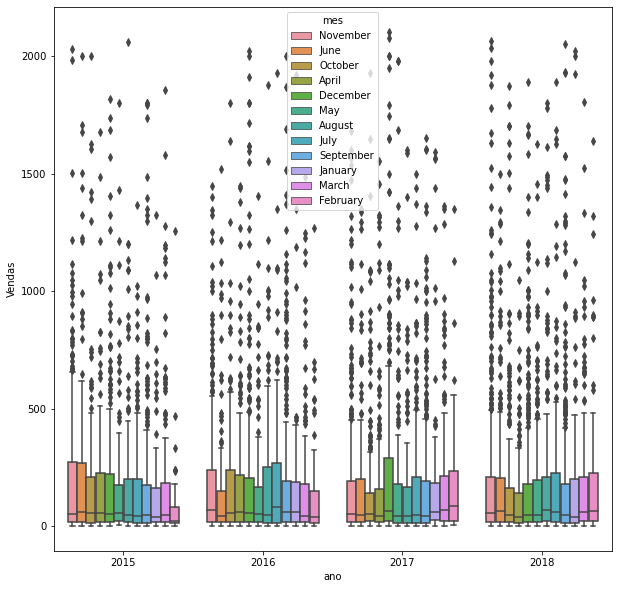

In [28]:
plt.figure(figsize=(10, 10))
fig=sns.boxplot(x="ano", y="Vendas" ,hue='mes',data=BD4,whis=1.5)

6.	Visualização das principais Variáveis;Separando em 4 data frames por ano , grafico de numeros de vendas mes a mes por anos excluindo os outliers extremos 

<Figure size 720x720 with 0 Axes>

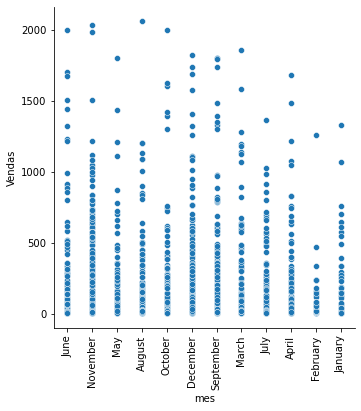

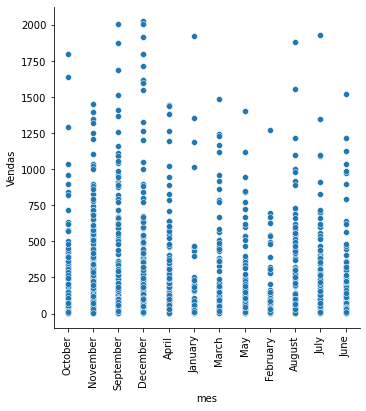

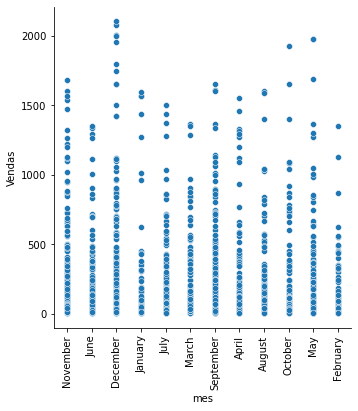

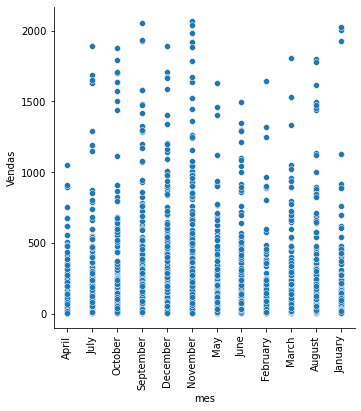

In [29]:
import seaborn as sns
plt.figure(figsize=(10, 10))

df5=BD4[BD4['ano'] == 2015] 
df6=BD4[BD4['ano'] == 2016] 
df7=BD4[BD4['ano'] == 2017] 
df8=BD4[BD4['ano'] == 2018] 
fig = sns.relplot(data= df5,x='mes', y="Vendas")
fig.set_xticklabels( rotation=90)
fig=sns.relplot(data= df6,x='mes', y="Vendas")
fig.set_xticklabels( rotation=90)
fig=sns.relplot(data= df7,x='mes', y="Vendas")
fig.set_xticklabels( rotation=90)
fig=sns.relplot(data= df8,x='mes', y="Vendas")
fig.set_xticklabels( rotation=90)

array([[<AxesSubplot:title={'center':'Vendas'}>,
        <AxesSubplot:title={'center':'ano'}>],
       [<AxesSubplot:title={'center':'dia'}>, <AxesSubplot:>]],
      dtype=object)

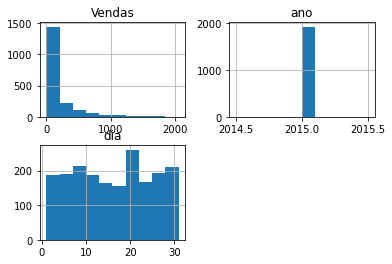

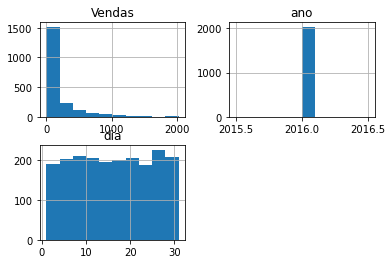

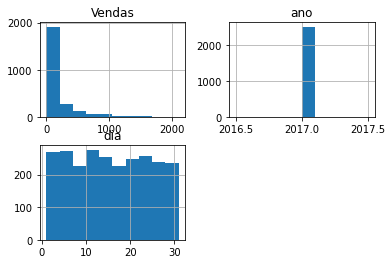

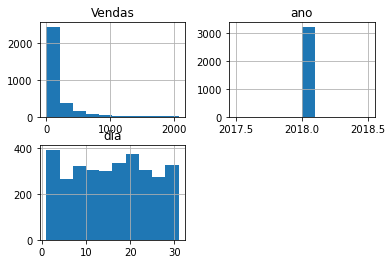

In [30]:
df5.hist()
df6.hist()
df7.hist()
df8.hist()

In [31]:
BD4.head()

,Data_ped,Data_env,Modo de envio,Nome do cliente,Cidade,ID do produto,Categoria,Subcategoria,Nome do produto,Vendas,ano,mes,dia
0,2017-11-08,2017-11-11,Second Class,Claire Gute,Henderson,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,November,8
1,2017-11-08,2017-11-11,Second Class,Claire Gute,Henderson,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,November,8
2,2017-06-12,2017-06-16,Second Class,Darrin Van Huff,Los Angeles,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,June,12
3,2016-10-11,2016-10-18,Standard Class,Sean O'Donnell,Fort Lauderdale,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,October,11
4,2016-10-11,2016-10-18,Standard Class,Sean O'Donnell,Fort Lauderdale,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,October,11


In [32]:
BD4=BD4.reset_index()
BD4.info

<bound method DataFrame.info of       index   Data_ped   Data_env   Modo de envio   Nome do cliente  \
0         0 2017-11-08 2017-11-11    Second Class       Claire Gute   
1         1 2017-11-08 2017-11-11    Second Class       Claire Gute   
2         2 2017-06-12 2017-06-16    Second Class   Darrin Van Huff   
3         3 2016-10-11 2016-10-18  Standard Class    Sean O'Donnell   
4         4 2016-10-11 2016-10-18  Standard Class    Sean O'Donnell   
...     ...        ...        ...             ...               ...   
9672   9795 2017-05-21 2017-05-28  Standard Class     Sally Hughsby   
9673   9796 2016-01-12 2016-01-17  Standard Class  Cindy Schnelling   
9674   9797 2016-01-12 2016-01-17  Standard Class  Cindy Schnelling   
9675   9798 2016-01-12 2016-01-17  Standard Class  Cindy Schnelling   
9676   9799 2016-01-12 2016-01-17  Standard Class  Cindy Schnelling   

               Cidade    ID do produto        Categoria Subcategoria  \
0           Henderson  FUR-BO-10001798     

Vamos obter algumas informaçoes interresantes da nossa Base de Dados 

In [33]:
print('Nome do produto que mais se repete',df5['Nome do produto'].mode())
print('Sub Categoria que mais se repete',df5['Subcategoria'].mode())
print('Media do numero vendas',df5['Vendas'].mean())
print('Numero de objeto mais vendido',df5['ID do produto'].max())
df5.describe()

Nome do produto que mais se repete 0    Staple envelope
dtype: object
Sub Categoria que mais se repete 0    Binders
dtype: object
Media do numero vendas 186.74035967825662
Numero de objeto mais vendido TEC-PH-10004977


,Vendas,ano,dia
count,1927.000000,1927.0,1927.000000
mean,186.740360,2015.0,15.710431
std,312.773691,0.0,8.813648
min,0.852000,2015.0,1.000000
25%,15.964000,2015.0,8.000000
50%,49.792000,2015.0,16.000000
75%,211.208000,2015.0,23.000000
max,2060.744000,2015.0,31.000000


In [34]:
print('Nome do produto que mais se repete',df6['Nome do produto'].mode())
print('Sub Categoria que mais se repete',df6['Subcategoria'].mode())
print('Media do numero vendas',df6['Vendas'].mean())
print('Numero de objeto mais vendido',df6['ID do produto'].max())
df6.describe()

Nome do produto que mais se repete 0    Easy-staple paper
1      Staple envelope
dtype: object
Sub Categoria que mais se repete 0    Binders
dtype: object
Media do numero vendas 186.27381448275858
Numero de objeto mais vendido TEC-PH-10004977


,Vendas,ano,dia
count,2030.000000,2030.0,2030.000000
mean,186.273814,2016.0,15.749754
std,305.524919,0.0,8.747847
min,0.984000,2016.0,1.000000
25%,17.125000,2016.0,8.000000
50%,56.493000,2016.0,16.000000
75%,206.350500,2016.0,24.000000
max,2025.360000,2016.0,31.000000


In [35]:
print('Nome do produto que mais se repete',df7['Nome do produto'].mode())
print('Sub Categoria que mais se repete',df7['Subcategoria'].mode())
print('Media do numero vendas',df7['Vendas'].mean())
print('Numero de objeto mais vendido',df7['ID do produto'].max())
df7.describe()

Nome do produto que mais se repete 0    Staple envelope
dtype: object
Sub Categoria que mais se repete 0    Binders
dtype: object
Media do numero vendas 182.3480173391932
Numero de objeto mais vendido TEC-PH-10004977


,Vendas,ano,dia
count,2503.000000,2503.0,2503.000000
mean,182.348017,2017.0,15.210547
std,307.134664,0.0,8.724444
min,0.836000,2017.0,1.000000
25%,17.736000,2017.0,8.000000
50%,51.750000,2017.0,15.000000
75%,195.038000,2017.0,23.000000
max,2104.550000,2017.0,31.000000


In [36]:
print('Nome do produto que mais se repete',df8['Nome do produto'].mode())
print('Sub Categoria que mais se repete',df8['Subcategoria'].mode())
print('Media do numero vendas',df8['Vendas'].mean())
print('Numero de objeto mais vendido',df8['ID do produto'].max())
df8.describe()

Nome do produto que mais se repete 0    Easy-staple paper
dtype: object
Sub Categoria que mais se repete 0    Binders
dtype: object
Media do numero vendas 174.76088566987931
Numero de objeto mais vendido TEC-PH-10004977


,Vendas,ano,dia
count,3217.000000,3217.0,3217.000000
mean,174.760886,2018.0,15.384209
std,300.918881,0.0,8.746661
min,0.444000,2018.0,1.000000
25%,16.768000,2018.0,8.000000
50%,51.550000,2018.0,16.000000
75%,195.960000,2018.0,23.000000
max,2065.320000,2018.0,31.000000


# **Análise profunda dos dados** 
# Machine learnig 

Nesta fase final , vamos atacar prontamente nosso problema atraves de regressão linear para descobrirmos quais seram os proximos setores/produtos vendidos , primeiramente vou passar nossa base de dados pela biblioteca lazy Predict para descobrir qual dos 40 modelos instalados de regressão sera, o mais indicado e depois da escolha do mesmo vamos manipular os hiper parametros para obter uma melhor resposta , ja dividimos nosso df em 4 e vamos usar essa divisão como teste e validação de forma deslisante.

In [37]:
!pip install pyforest 
!pip install lazypredict

In [38]:
# Importing important libraries

import pyforest
from lazypredict.Supervised import LazyRegressor
from pandas.plotting import scatter_matrix

# Scikit-learn packages
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error

# Setting up max columns displayes to 100
pd.options.display.max_columns = None
pd.set_option('display.width', None)

# Hide warnings
import warnings
warnings.filterwarnings("ignore")

# Set theme
sns.set_style('darkgrid')

C:\Users\jonas\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [39]:
# Importing dataset
df = df5
df.head
BD4.isnull().sum()

index              0
Data_ped           0
Data_env           0
Modo de envio      0
Nome do cliente    0
Cidade             0
ID do produto      0
Categoria          0
Subcategoria       0
Nome do produto    0
Vendas             0
ano                0
mes                0
dia                0
dtype: int64

In [40]:
df.columns

Index(['Data_ped', 'Data_env', 'Modo de envio', 'Nome do cliente', 'Cidade',
       'ID do produto', 'Categoria', 'Subcategoria', 'Nome do produto',
       'Vendas', 'ano', 'mes', 'dia'],
      dtype='object')

In [41]:
df = df.drop(columns=['Data_ped', 'Data_env','ano','Modo de envio','ID do produto','Nome do cliente','Cidade','Categoria', 'Subcategoria', 'Nome do produto'])

In [42]:
df.info
df.head

<bound method NDFrame.head of       Vendas       mes  dia
5      48.86      June    9
6       7.28      June    9
7     907.15      June    9
8      18.50      June    9
9     114.90      June    9
...      ...       ...  ...
9786  149.90  November    5
9791   56.06       May   21
9792  107.77       May   21
9793    4.83       May   21
9794   18.24       May   21

[1927 rows x 3 columns]>

In [43]:
# Creating train test split
import calendar
dic = {'01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May','06': 'June', '07': 'July', '08': 'August', '09': 'September', '10': 'October', '11': 'November', '12': 'December'}
dic = dict((v,k) for k,v in dic.items())
df['Mes'] = (df['mes'].apply(lambda X: dic[X])).astype(int)
y = df['Vendas']
x = df.drop(columns=['mes', 'Vendas'])
x

,dia,Mes
5,9,6
6,9,6
7,9,6
8,9,6
9,9,6
...,...,...
9786,5,11
9791,21,5
9792,21,5
9793,21,5


In [44]:
df.head

<bound method NDFrame.head of       Vendas       mes  dia  Mes
5      48.86      June    9    6
6       7.28      June    9    6
7     907.15      June    9    6
8      18.50      June    9    6
9     114.90      June    9    6
...      ...       ...  ...  ...
9786  149.90  November    5   11
9791   56.06       May   21    5
9792  107.77       May   21    5
9793    4.83       May   21    5
9794   18.24       May   21    5

[1927 rows x 4 columns]>

In [45]:
# Call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=3,test_size=0.25)

# Checking if the training set was correcly splitted
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (1445, 2) Target:  (1445,)
Test set - Features:  (482, 2) Target:  (482,)


In [46]:
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 42/42 [00:06<00:00,  6.68it/s]

                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
BayesianRidge                               -0.00      -0.00 320.99   
LassoLars                                   -0.00      -0.00 320.99   
ElasticNetCV                                -0.00      -0.00 320.99   
LassoCV                                     -0.00      -0.00 320.99   
LassoLarsIC                                 -0.00      -0.00 320.99   
LassoLarsCV                                 -0.00      -0.00 320.99   
DummyRegressor                              -0.00      -0.00 320.99   
LarsCV                                      -0.00      -0.00 320.99   
GammaRegressor                              -0.00      -0.00 321.01   
GeneralizedLinearRegressor                  -0.00      -0.00 321.01   
TweedieRegressor                            -0.00      -0.00 321.01   
ElasticNet                                  -0.00      -0.00 321.03   
Lasso 

In [47]:
# Evaluation Function
def rmse(model, y_test, y_pred, X_train, y_train):
    r_squared = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print('R-squared: ' + str(r_squared))
    print('Mean Squared Error: '+ str(rmse))

In [48]:
# Create model line scatter plot
def scatter_plot(y_test, y_pred, model_name):
    plt.figure(figsize=(10,6))
    sns.residplot(y_test, y_pred, lowess=True, color='#4682b4',
              line_kws={'lw': 2, 'color': 'r'})
    plt.title(str('Price vs Residuals for \n' + model_name), fontsize=16)
    plt.xlabel('Price',fontsize=16)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.show()

In [49]:
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingRegressor

In [50]:
# Histogram-based Gradient Boosting Regression Tree
hist = HistGradientBoostingRegressor()
hist.fit(X_train, y_train)
y_pred = hist.predict(X_test)

In [51]:
rmse(hist, y_test, y_pred, X_train, y_train)

R-squared: -0.06789134965630717
Mean Squared Error: 331.67793658774764


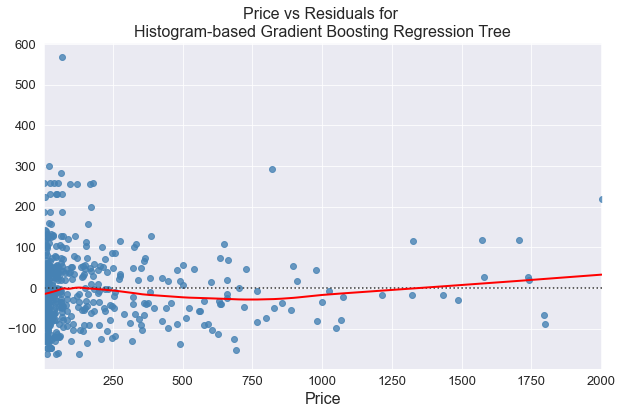

In [52]:
scatter_plot(y_test, y_pred, 'Histogram-based Gradient Boosting Regression Tree')

In [53]:
# Importing dataset
df = df6
df.head
BD4.isnull().sum()

index              0
Data_ped           0
Data_env           0
Modo de envio      0
Nome do cliente    0
Cidade             0
ID do produto      0
Categoria          0
Subcategoria       0
Nome do produto    0
Vendas             0
ano                0
mes                0
dia                0
dtype: int64

In [54]:
df.columns

Index(['Data_ped', 'Data_env', 'Modo de envio', 'Nome do cliente', 'Cidade',
       'ID do produto', 'Categoria', 'Subcategoria', 'Nome do produto',
       'Vendas', 'ano', 'mes', 'dia'],
      dtype='object')

In [55]:
df = df.drop(columns=['Data_ped', 'Data_env','ano','Modo de envio','ID do produto','Nome do cliente','Cidade','Categoria', 'Subcategoria', 'Nome do produto'])

In [56]:
df.info
df.head

<bound method NDFrame.head of       Vendas        mes  dia
3     957.58    October   11
4      22.37    October   11
14     68.81   November   22
15      2.54   November   22
24   1044.63  September   25
...      ...        ...  ...
9785   48.81        May    9
9796   10.37    January   12
9797  235.19    January   12
9798   26.38    January   12
9799   10.38    January   12

[2030 rows x 3 columns]>

In [57]:
# Creating train test split
import calendar
dic = {'01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May','06': 'June', '07': 'July', '08': 'August', '09': 'September', '10': 'October', '11': 'November', '12': 'December'}
dic = dict((v,k) for k,v in dic.items())
df['Mes'] = (df['mes'].apply(lambda X: dic[X])).astype(int)
y = df['Vendas']
x = df.drop(columns=['mes', 'Vendas'])
x

,dia,Mes
3,11,10
4,11,10
14,22,11
15,22,11
24,25,9
...,...,...
9785,9,5
9796,12,1
9797,12,1
9798,12,1


In [58]:
df.head

<bound method NDFrame.head of       Vendas        mes  dia  Mes
3     957.58    October   11   10
4      22.37    October   11   10
14     68.81   November   22   11
15      2.54   November   22   11
24   1044.63  September   25    9
...      ...        ...  ...  ...
9785   48.81        May    9    5
9796   10.37    January   12    1
9797  235.19    January   12    1
9798   26.38    January   12    1
9799   10.38    January   12    1

[2030 rows x 4 columns]>

In [59]:
# Call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=3,test_size=0.25)

# Checking if the training set was correcly splitted
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (1522, 2) Target:  (1522,)
Test set - Features:  (508, 2) Target:  (508,)


In [60]:
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 42/42 [00:05<00:00,  7.40it/s]

                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
SGDRegressor                                -0.01      -0.00 326.94   
OrthogonalMatchingPursuit                   -0.01      -0.00 327.15   
OrthogonalMatchingPursuitCV                 -0.01      -0.00 327.15   
Lars                                        -0.01      -0.00 327.15   
LinearRegression                            -0.01      -0.00 327.15   
TransformedTargetRegressor                  -0.01      -0.00 327.15   
Ridge                                       -0.01      -0.00 327.15   
PoissonRegressor                            -0.01      -0.00 327.15   
RidgeCV                                     -0.01      -0.00 327.15   
Lasso                                       -0.01      -0.00 327.20   
ElasticNet                                  -0.01      -0.00 327.22   
GammaRegressor                              -0.01      -0.00 327.23   
MLPReg

In [61]:
# Evaluation Function
def rmse(model, y_test, y_pred, X_train, y_train):
    r_squared = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print('R-squared: ' + str(r_squared))
    print('Mean Squared Error: '+ str(rmse))

In [62]:
# Create model line scatter plot
def scatter_plot(y_test, y_pred, model_name):
    plt.figure(figsize=(10,6))
    sns.residplot(y_test, y_pred, lowess=True, color='#4682b4',
              line_kws={'lw': 2, 'color': 'r'})
    plt.title(str('Price vs Residuals for \n' + model_name), fontsize=16)
    plt.xlabel('Price',fontsize=16)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.show()

In [63]:
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingRegressor

In [64]:
# Histogram-based Gradient Boosting Regression Tree
hist = HistGradientBoostingRegressor()
hist.fit(X_train, y_train)
y_pred = hist.predict(X_test)

In [65]:
rmse(hist, y_test, y_pred, X_train, y_train)

R-squared: -0.07273074492898601
Mean Squared Error: 338.25959225457814


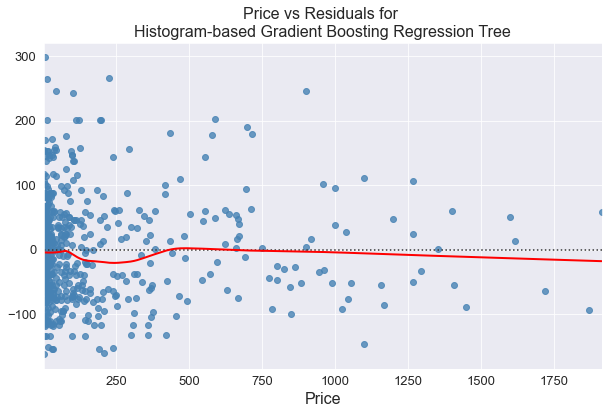

In [66]:
scatter_plot(y_test, y_pred, 'Histogram-based Gradient Boosting Regression Tree')

In [67]:
# Importing dataset
df = df7
df.head
BD4.isnull().sum()

index              0
Data_ped           0
Data_env           0
Modo de envio      0
Nome do cliente    0
Cidade             0
ID do produto      0
Categoria          0
Subcategoria       0
Nome do produto    0
Vendas             0
ano                0
mes                0
dia                0
dtype: int64

In [68]:
df.columns

Index(['Data_ped', 'Data_env', 'Modo de envio', 'Nome do cliente', 'Cidade',
       'ID do produto', 'Categoria', 'Subcategoria', 'Nome do produto',
       'Vendas', 'ano', 'mes', 'dia'],
      dtype='object')

In [69]:
df = df.drop(columns=['Data_ped', 'Data_env','ano','Modo de envio','ID do produto','Nome do cliente','Cidade','Categoria', 'Subcategoria', 'Nome do produto'])

In [70]:
df.info
df.head

<bound method NDFrame.head of       Vendas        mes  dia
0     261.96   November    8
1     731.94   November    8
2      14.62       June   12
13    407.98   December    5
21     19.46   December    9
...      ...        ...  ...
9772  123.92       July    3
9773  135.95       June   26
9780  437.85  September   14
9781  673.57  September   14
9795    3.80        May   21

[2503 rows x 3 columns]>

In [71]:
# Creating train test split
import calendar
dic = {'01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May','06': 'June', '07': 'July', '08': 'August', '09': 'September', '10': 'October', '11': 'November', '12': 'December'}
dic = dict((v,k) for k,v in dic.items())
df['Mes'] = (df['mes'].apply(lambda X: dic[X])).astype(int)
y = df['Vendas']
x = df.drop(columns=['mes', 'Vendas'])
x

,dia,Mes
0,8,11
1,8,11
2,12,6
13,5,12
21,9,12
...,...,...
9772,3,7
9773,26,6
9780,14,9
9781,14,9


In [72]:
df.head

<bound method NDFrame.head of       Vendas        mes  dia  Mes
0     261.96   November    8   11
1     731.94   November    8   11
2      14.62       June   12    6
13    407.98   December    5   12
21     19.46   December    9   12
...      ...        ...  ...  ...
9772  123.92       July    3    7
9773  135.95       June   26    6
9780  437.85  September   14    9
9781  673.57  September   14    9
9795    3.80        May   21    5

[2503 rows x 4 columns]>

In [73]:
# Call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=3,test_size=0.25)

# Checking if the training set was correcly splitted
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (1877, 2) Target:  (1877,)
Test set - Features:  (626, 2) Target:  (626,)


In [74]:
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 42/42 [00:06<00:00,  6.42it/s]

                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
MLPRegressor                                -0.00       0.00 324.75   
SGDRegressor                                -0.01      -0.00 325.68   
BayesianRidge                               -0.01      -0.01 325.90   
LassoLars                                   -0.01      -0.01 325.90   
LassoLarsCV                                 -0.01      -0.01 325.90   
LassoCV                                     -0.01      -0.01 325.90   
LarsCV                                      -0.01      -0.01 325.90   
LassoLarsIC                                 -0.01      -0.01 325.90   
ElasticNetCV                                -0.01      -0.01 325.90   
DummyRegressor                              -0.01      -0.01 325.90   
GeneralizedLinearRegressor                  -0.01      -0.01 325.92   
TweedieRegressor                            -0.01      -0.01 325.92   
GammaR

In [75]:
# Evaluation Function
def rmse(model, y_test, y_pred, X_train, y_train):
    r_squared = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print('R-squared: ' + str(r_squared))
    print('Mean Squared Error: '+ str(rmse))

In [76]:
# Create model line scatter plot
def scatter_plot(y_test, y_pred, model_name):
    plt.figure(figsize=(10,6))
    sns.residplot(y_test, y_pred, lowess=True, color='#4682b4',
              line_kws={'lw': 2, 'color': 'r'})
    plt.title(str('Price vs Residuals for \n' + model_name), fontsize=16)
    plt.xlabel('Price',fontsize=16)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.show()

In [77]:
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingRegressor

In [78]:
# Histogram-based Gradient Boosting Regression Tree
hist = HistGradientBoostingRegressor()
hist.fit(X_train, y_train)
y_pred = hist.predict(X_test)

In [79]:
rmse(hist, y_test, y_pred, X_train, y_train)

R-squared: -0.07067928868130213
Mean Squared Error: 336.2324022621217


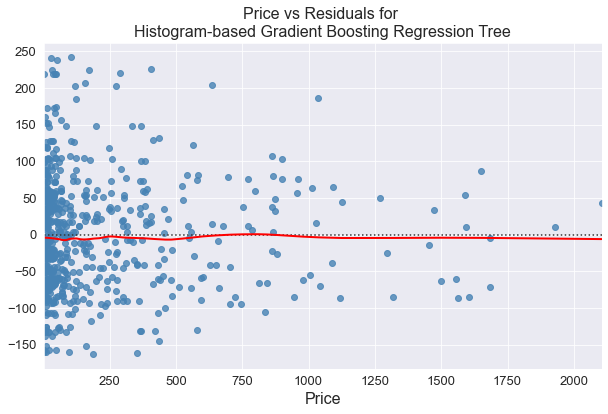

In [80]:
scatter_plot(y_test, y_pred, 'Histogram-based Gradient Boosting Regression Tree')

In [81]:
# Importing dataset
df = df8
df.head
BD4.isnull().sum()

index              0
Data_ped           0
Data_env           0
Modo de envio      0
Nome do cliente    0
Cidade             0
ID do produto      0
Categoria          0
Subcategoria       0
Nome do produto    0
Vendas             0
ano                0
mes                0
dia                0
dtype: int64

In [82]:
df.columns

Index(['Data_ped', 'Data_env', 'Modo de envio', 'Nome do cliente', 'Cidade',
       'ID do produto', 'Categoria', 'Subcategoria', 'Nome do produto',
       'Vendas', 'ano', 'mes', 'dia'],
      dtype='object')

In [83]:
df = df.drop(columns=['Data_ped', 'Data_env','ano','Modo de envio','ID do produto','Nome do cliente','Cidade','Categoria', 'Subcategoria', 'Nome do produto'])

In [84]:
df.info
df.head

<bound method NDFrame.head of       Vendas        mes  dia
12     15.55      April   15
23     71.37       July   16
34     29.47    October   19
41    147.17  September   10
43     95.62  September   19
...      ...        ...  ...
9768   50.04   December    7
9787 1023.33      March   27
9788  600.56      March   27
9789   39.99      March   27
9790  211.25      March   27

[3217 rows x 3 columns]>

In [85]:
# Creating train test split
import calendar
dic = {'01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May','06': 'June', '07': 'July', '08': 'August', '09': 'September', '10': 'October', '11': 'November', '12': 'December'}
dic = dict((v,k) for k,v in dic.items())
df['Mes'] = (df['mes'].apply(lambda X: dic[X])).astype(int)
y = df['Vendas']
x = df.drop(columns=['mes', 'Vendas'])
x

,dia,Mes
12,15,4
23,16,7
34,19,10
41,10,9
43,19,9
...,...,...
9768,7,12
9787,27,3
9788,27,3
9789,27,3


In [86]:
df.head

<bound method NDFrame.head of       Vendas        mes  dia  Mes
12     15.55      April   15    4
23     71.37       July   16    7
34     29.47    October   19   10
41    147.17  September   10    9
43     95.62  September   19    9
...      ...        ...  ...  ...
9768   50.04   December    7   12
9787 1023.33      March   27    3
9788  600.56      March   27    3
9789   39.99      March   27    3
9790  211.25      March   27    3

[3217 rows x 4 columns]>

In [87]:
# Call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=3,test_size=0.25)

# Checking if the training set was correcly splitted
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (2412, 2) Target:  (2412,)
Test set - Features:  (805, 2) Target:  (805,)


In [88]:
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 42/42 [00:08<00:00,  5.20it/s]

                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
MLPRegressor                                -0.00       0.00 289.33   
SGDRegressor                                -0.00      -0.00 289.38   
LassoLars                                   -0.00      -0.00 289.40   
LassoLarsCV                                 -0.00      -0.00 289.40   
LassoCV                                     -0.00      -0.00 289.40   
LarsCV                                      -0.00      -0.00 289.40   
LassoLarsIC                                 -0.00      -0.00 289.40   
DummyRegressor                              -0.00      -0.00 289.40   
ElasticNetCV                                -0.00      -0.00 289.40   
BayesianRidge                               -0.00      -0.00 289.40   
GammaRegressor                              -0.00      -0.00 289.60   
GeneralizedLinearRegressor                  -0.00      -0.00 289.61   
Tweedi

In [89]:
# Evaluation Function
def rmse(model, y_test, y_pred, X_train, y_train):
    r_squared = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print('R-squared: ' + str(r_squared))
    print('Mean Squared Error: '+ str(rmse))

In [90]:
# Create model line scatter plot
def scatter_plot(y_test, y_pred, model_name):
    plt.figure(figsize=(10,6))
    sns.residplot(y_test, y_pred, lowess=True, color='#4682b4',
              line_kws={'lw': 2, 'color': 'r'})
    plt.title(str('Price vs Residuals for \n' + model_name), fontsize=16)
    plt.xlabel('Price',fontsize=16)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.show()

In [91]:
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingRegressor

In [92]:
# Histogram-based Gradient Boosting Regression Tree
hist = HistGradientBoostingRegressor()
hist.fit(X_train, y_train)
y_pred = hist.predict(X_test)

In [93]:
rmse(hist, y_test, y_pred, X_train, y_train)

R-squared: -0.04993263002338133
Mean Squared Error: 296.5083743756094


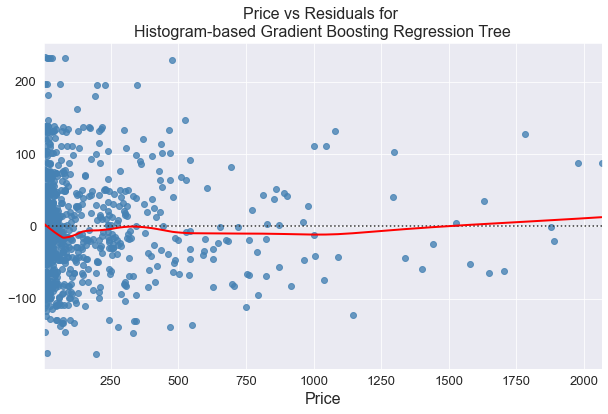

In [94]:
scatter_plot(y_test, y_pred, 'Histogram-based Gradient Boosting Regression Tree')

O modelo que melhor se adequou foi MLPRegressor  RMSE 289.33   com isso vamos trabalhar mlhor nele 

Com isso vemos que ignorando os dados e so pensando na data de venda e valores não conseguiremos chegar em um modelo ideal.

In [172]:
df=BD4
y = df['Vendas']
X = df.drop(columns=['mes', 'Vendas'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9677 entries, 0 to 9676
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   index            9677 non-null   int64         
 1   Data_ped         9677 non-null   datetime64[ns]
 2   Data_env         9677 non-null   datetime64[ns]
 3   Modo de envio    9677 non-null   object        
 4   Nome do cliente  9677 non-null   object        
 5   Cidade           9677 non-null   object        
 6   ID do produto    9677 non-null   object        
 7   Categoria        9677 non-null   object        
 8   Subcategoria     9677 non-null   object        
 9   Nome do produto  9677 non-null   object        
 10  Vendas           9677 non-null   float64       
 11  ano              9677 non-null   int64         
 12  mes              9677 non-null   object        
 13  dia              9677 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(

In [110]:
#df = BD4.drop(columns=['Data_ped', 'Data_env','ano','Modo de envio','ID do produto','Nome do cliente','Cidade','Categoria', 'Subcategoria', 'Nome do produto'])

In [174]:
# Creating train test split
import calendar
dic = {'01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May','06': 'June', '07': 'July', '08': 'August', '09': 'September', '10': 'October', '11': 'November', '12': 'December'}
dic = dict((v,k) for k,v in dic.items())
df['Mes'] = (df['mes'].apply(lambda X: dic[X])).astype(int)
y = df['Vendas']
x = df.drop(columns=['mes', 'Vendas'])
print(x)

      index   Data_ped   Data_env   Modo de envio   Nome do cliente  \
0         0 2017-11-08 2017-11-11    Second Class       Claire Gute   
1         1 2017-11-08 2017-11-11    Second Class       Claire Gute   
2         2 2017-06-12 2017-06-16    Second Class   Darrin Van Huff   
3         3 2016-10-11 2016-10-18  Standard Class    Sean O'Donnell   
4         4 2016-10-11 2016-10-18  Standard Class    Sean O'Donnell   
...     ...        ...        ...             ...               ...   
9672   9795 2017-05-21 2017-05-28  Standard Class     Sally Hughsby   
9673   9796 2016-01-12 2016-01-17  Standard Class  Cindy Schnelling   
9674   9797 2016-01-12 2016-01-17  Standard Class  Cindy Schnelling   
9675   9798 2016-01-12 2016-01-17  Standard Class  Cindy Schnelling   
9676   9799 2016-01-12 2016-01-17  Standard Class  Cindy Schnelling   

               Cidade    ID do produto        Categoria Subcategoria  \
0           Henderson  FUR-BO-10001798        Furniture    Bookcases   
1  

In [175]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [176]:
X, y = make_regression(n_samples=9677)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)
regr = MLPRegressor(random_state=1, max_iter=1500).fit(X_train, y_train)
regr.predict(X_test[:5000]) #metodo multicamadas
regr.score(X_test, y_test)

0.999508088158644

In [171]:
y_test=pd.DataFrame(y_test,columns=['y_test'])
y_test.to_csv(r'./teste.csv', encoding='utf-8', header='true')
y_test.head(25)
print(y_test)

      y_test
0       9.86
1    -235.25
2      64.96
3    -197.53
4      55.37
...      ...
2415   66.81
2416  123.63
2417   31.51
2418   70.99
2419  -41.24

[2420 rows x 1 columns]


Resultados não satisfatorios valores de vendas negativos. mesmo com a variação de parametros, vou verificar com arvore de decisão, um algoritimo de classificação

In [160]:
!pip install.packages("e1071")

ERROR: unknown command "install.packages(e1071)"



In [163]:
from sklearn.tree import DecisionTreeClassifier

tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)
y_pred = tree_classifier.predict(X_test)

tree_cm = confusion_matrix(y_pred, y_test)

print('matriz de confusão:')
print(tree_cm,'\n')
print('precisão: ',accuracy(tree_cm)*100, '%')
classification_view(X_train, y_train, tree_classifier)

ValueError: Unknown label type: 'continuous'